
# Netflix Userbase Analysis

## Introduction
This notebook presents a thorough analysis of a Netflix userbase dataset. The goal is to uncover insights into user demographics, subscription preferences, and usage patterns.

### Dataset Description
The dataset includes the following columns:
- **User ID**: The unique identifier for each user.
- **Subscription Type**: Type of subscription (Basic, Premium, Standard).
- **Monthly Revenue**: Monthly revenue per user.
- **Join Date**: When the user joined Netflix.
- **Last Payment Date**: Most recent payment date.
- **Country**: Country of the user.
- **Age**: Age of the user.
- **Gender**: Gender of the user.
- **Device**: Device used for streaming.
- **Plan Duration**: Duration of the subscription plan.
- **Tenure (Months)**: Calculated tenure of the user in months.

### Objectives
- Perform data cleaning and standardization.
- Conduct exploratory data analysis.
- Answer specific research questions.
- Provide visual insights and statistical analysis.



## Data Loading and Cleaning

We load the data from a CSV file, convert date columns to a uniform format, handle any missing or erroneous data entries, and calculate the tenure in months.


In [8]:

import pandas as pd

#dataset from : https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset
data = pd.read_csv('C:\\Users\\ramra\\Netflix Userbase\\Netflix Userbase New.csv')

#Convert Join date and Late Payment col from sting to data time 
#Set errors to convert invaild date to NaT 
data['Join Date'] = pd.to_datetime(data['Join Date'], format='%d-%m-%Y', errors='coerce')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='%d-%m-%Y', errors='coerce')

# Calculate the tenure in months
data['Tenure (Months)'] = (data['Last Payment Date'] - data['Join Date']).dt.days / 30

#Display first 5 rows
data.head()



,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Tenure (Months)
0,1,Basic,10,NaT,NaT,United States,28,Male,Smartphone,1 Month,NaN
1,2,Premium,15,NaT,NaT,Canada,35,Female,Tablet,1 Month,NaN
2,3,Standard,12,NaT,NaT,United Kingdom,42,Male,Smart TV,1 Month,NaN
3,4,Standard,12,NaT,NaT,Australia,51,Female,Laptop,1 Month,NaN
4,5,Basic,10,NaT,NaT,Germany,33,Male,Smartphone,1 Month,NaN



## Exploratory Data Analysis (EDA)

### Descriptive Statistics
We begin by describing the data to get a feel for the distributions and central tendencies of the variables.




In [16]:
data.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Tenure (Months)
count,2500.00000,2500.000000,0,0,2500.000000,0.0
mean,1250.50000,12.508400,NaT,NaT,38.795600,NaN
min,1.00000,10.000000,NaT,NaT,26.000000,NaN
25%,625.75000,11.000000,NaT,NaT,32.000000,NaN
50%,1250.50000,12.000000,NaT,NaT,39.000000,NaN
75%,1875.25000,14.000000,NaT,NaT,45.000000,NaN
max,2500.00000,15.000000,NaT,NaT,51.000000,NaN
std,721.83216,1.686851,NaN,NaN,7.171778,NaN


### Visualizations
Visualizations are used to explore the data further, focusing on distributions of age, monthly revenue, and tenure.


C:\Users\ramra\AppData\Local\Temp\ipykernel_58744\669655183.py:10: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


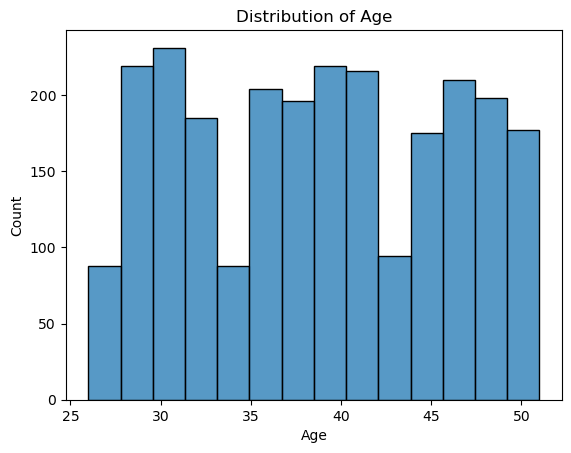

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Covert infinites to NaN 
data['Age'] = data['Age'].replace([np.inf,-np.inf],np.mean)

# Use pandas option context to treat infinities as NaN during plotting
with pd.option_context('mode.use_inf_as_na', True):
    # Plotting the distribution of age
    sns.histplot(data['Age'].dropna())  # Drop NaN values for clean plotting
    plt.title('Distribution of Age')
    plt.show()



The distrutuion is fairly similar suggesting ages 25-50 have a similar count.


## Research Questions and Answers

### Question 1: How does the average monthly revenue vary by subscription type?
We group the data by subscription type and calculate the average revenue.



In [15]:

# Average revenue by subscription type
print(data.groupby('Subscription Type')['Monthly Revenue'].mean())



Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


### Question 2: What is the average age of users by country?
This question examines if certain countries have older or younger userbases on average.

In [14]:
# Average age by country
print(data.groupby('Country')['Age'].mean())

Country
Australia         38.355191
Brazil            38.327869
Canada            38.697161
France            39.109290
Germany           39.038251
Italy             38.551913
Mexico            38.830601
Spain             38.800443
United Kingdom    39.191257
United States     38.926829
Name: Age, dtype: float64


It is suprising to know the average age of user is 38 or 39.
    


## Conclusion

### Summary of Findings
- The average monthly revenue is relatively consistent across subscription types.
- The user base's age varies slightly by country, which may affect content preferences.

